In [1]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv("../data/processed/pre-processados.csv")

dados = dados.drop(columns=["Ultimo IGC Categoria","Variacao IGC","Saldo 2017 Positivo"])

dados['Fim Lucrativo'] = dados['Fim Lucrativo'].map({'Lucrativo': 1, 'Não Lucrativo': 0})

dados['Situacao'] = dados['Situacao'].map({'Ativa': 1, 'Extinta': 0})

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Codigo da IES             1420 non-null   int64  
 1   Fim Lucrativo             1420 non-null   int64  
 2   Situacao                  1420 non-null   int64  
 3   DIAS                      1420 non-null   int64  
 4   Cursos Sem Ato 5 anos     1420 non-null   float64
 5   Ultimo CI                 1420 non-null   float64
 6   Ultimo IGC                1420 non-null   float64
 7   EAD_17                    1420 non-null   int64  
 8   Variacao Matricula 16/17  1420 non-null   float64
 9   Matriculas 17             1420 non-null   int64  
 10  % FIES                    1420 non-null   float64
 11  CURSOS                    1420 non-null   int64  
 12  Saldo 2017                1420 non-null   float64
 13  Variacao do Saldo 16/17   1420 non-null   float64
dtypes: float

In [4]:
dados['Situacao'].value_counts()

1    1335
0      85
Name: Situacao, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

colunas = ['Fim Lucrativo', 'DIAS', 'Cursos Sem Ato 5 anos', 'Ultimo CI',
          'Ultimo IGC', 'EAD_17', 'Variacao Matricula 16/17', 'Matriculas 17',
          '% FIES', 'CURSOS', 'Saldo 2017', 'Variacao do Saldo 16/17']

X = dados[colunas]
Y = dados['Situacao']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
import numpy as np

classes, contagens = np.unique( y_train, return_counts=True )
print(dict(zip(classes, contagens)))

{0: 66, 1: 1070}


In [8]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_balanceado, y_train_balanceado = smote.fit_resample( X_train, y_train )

classes, contagens = np.unique( y_train_balanceado, return_counts=True )
print(dict(zip(classes, contagens)))

{0: 1070, 1: 1070}


Accuracy: 0.8380281690140845

Confusion Matrix:
 [[ 12   7]
 [ 39 226]]

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.63      0.34        19
           1       0.97      0.85      0.91       265

    accuracy                           0.84       284
   macro avg       0.60      0.74      0.63       284
weighted avg       0.92      0.84      0.87       284



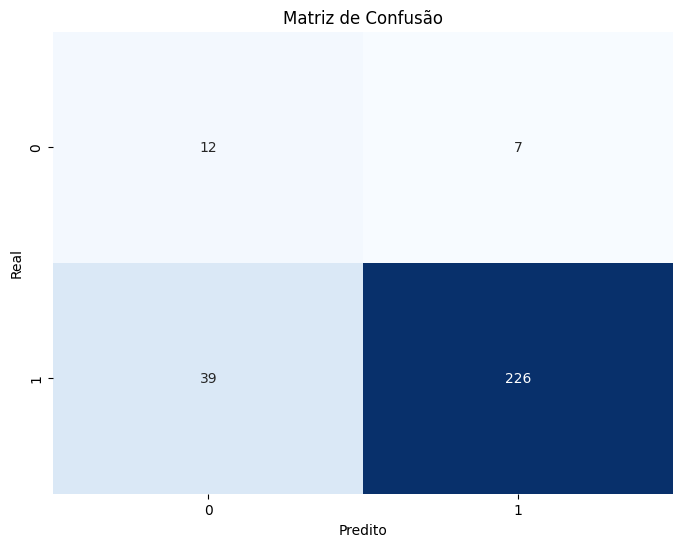

In [12]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train_balanceado, y_train_balanceado)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

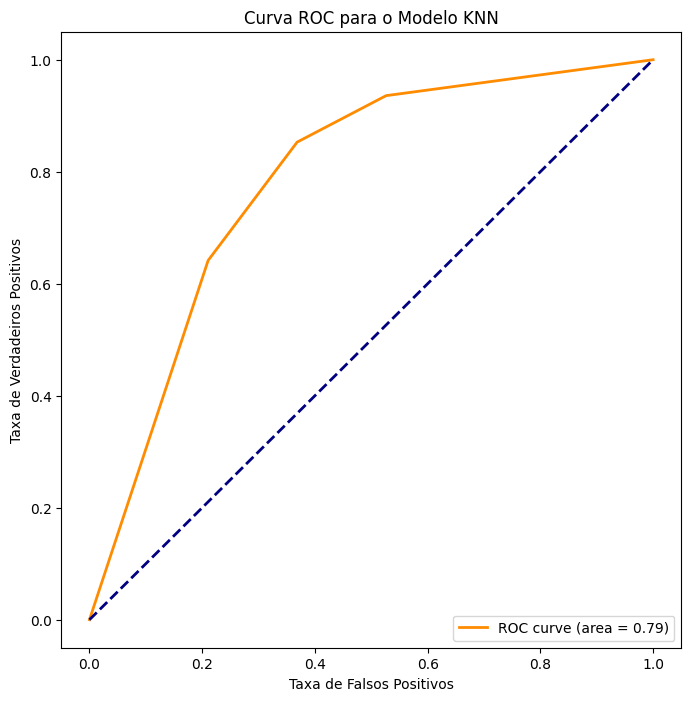

In [13]:
from sklearn.metrics import roc_curve, auc

y_prob = knn_model.predict_proba(X_test)[:, 1]

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcule a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)

# Plote a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para o Modelo KNN')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.8908450704225352

Confusion Matrix:
 [[ 11   8]
 [ 23 242]]

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.58      0.42        19
           1       0.97      0.91      0.94       265

    accuracy                           0.89       284
   macro avg       0.65      0.75      0.68       284
weighted avg       0.92      0.89      0.90       284



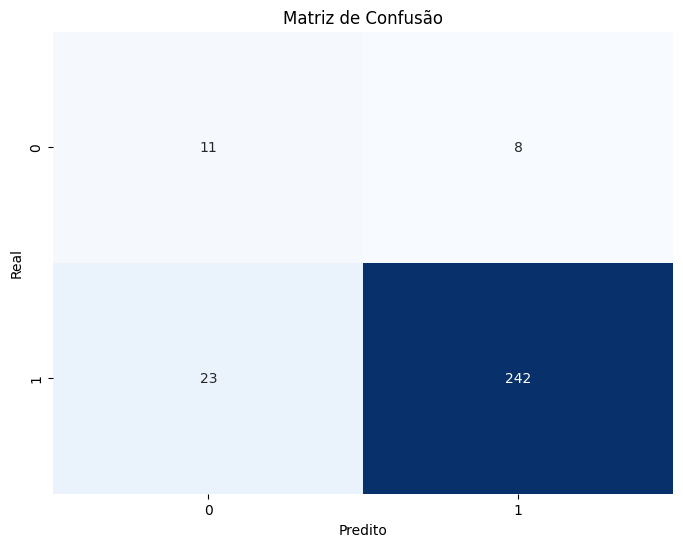

In [21]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

decision_tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5,random_state=42)

decision_tree_model.fit(X_train_balanceado, y_train_balanceado)

y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

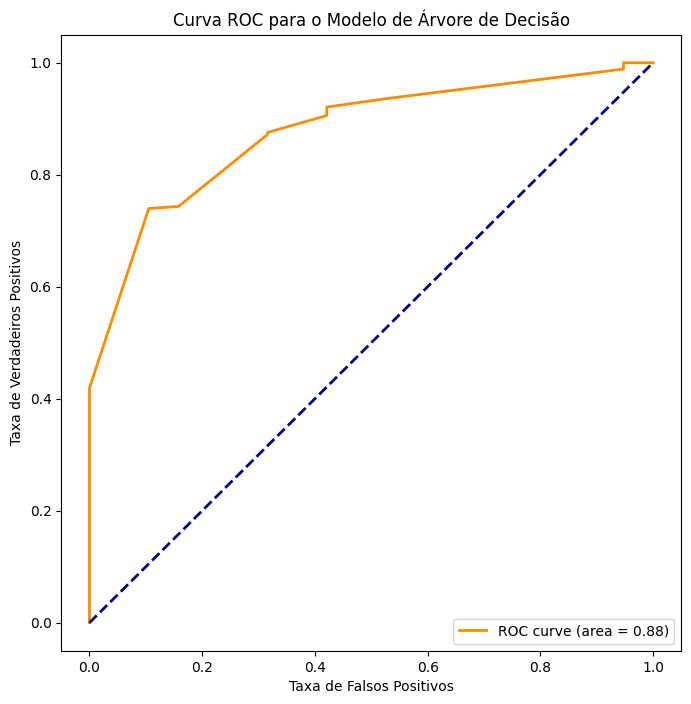

In [22]:
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcule a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)

# Plote a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para o Modelo de Árvore de Decisão')
plt.legend(loc="lower right")
plt.show()

In [19]:
pip install graphviz

In [23]:
from sklearn.tree import export_graphviz
import graphviz

# Exporte a árvore de decisão para um arquivo .dot
dot_data = export_graphviz(decision_tree_model, out_file=None,
                           feature_names=X.columns,
                           class_names=dados["Situacao"].unique().astype(str),
                           filled=True, rounded=True, special_characters=True)

# Crie um objeto Graphviz a partir do arquivo .dot
graph = graphviz.Source(dot_data)

# Exiba a árvore de decisão
graph.render("iris_tree")
graph.view("iris_tree")

'iris_tree.pdf'

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Inicializar o modelo de Floresta Aleatória
rf_model = RandomForestClassifier(n_estimators=100 ,random_state=42)

# Treinar o modelo
rf_model.fit(X_train_balanceado, y_train_balanceado)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Calcular métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir as métricas
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.9014
Precisão: 0.9232
Recall: 0.9014
F1-Score: 0.9107
Matriz de Confusão:
 [[ 10   9]
 [ 19 246]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.34      0.53      0.42        19
           1       0.96      0.93      0.95       265

    accuracy                           0.90       284
   macro avg       0.65      0.73      0.68       284
weighted avg       0.92      0.90      0.91       284



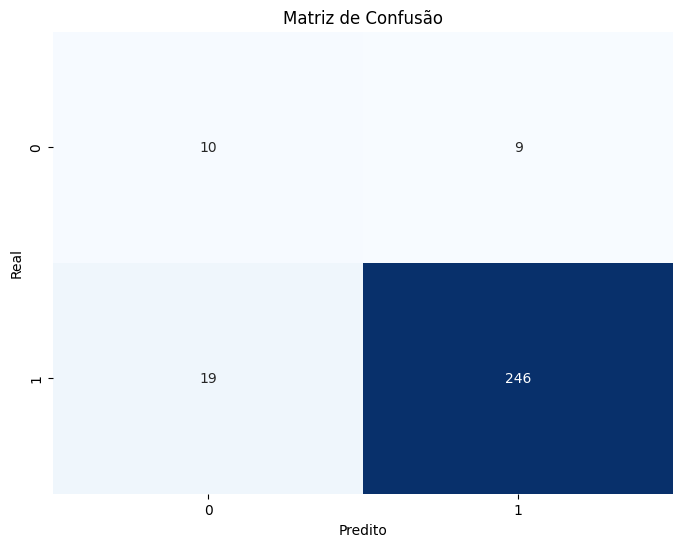

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

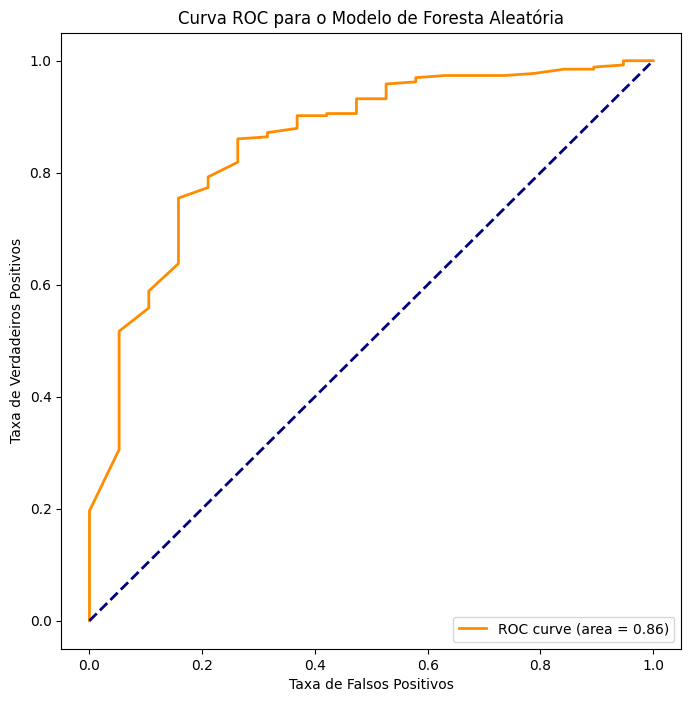

In [29]:
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcule a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)

# Plote a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para o Modelo de Foresta Aleatória')
plt.legend(loc="lower right")
plt.show()

In [30]:
X_train_balanceado.head()

,Fim Lucrativo,DIAS,Cursos Sem Ato 5 anos,Ultimo CI,Ultimo IGC,EAD_17,Variacao Matricula 16/17,Matriculas 17,% FIES,CURSOS,Saldo 2017,Variacao do Saldo 16/17
0,1,1160,0.676471,3.0,2.9883,1,-0.072877,1825,0.425205,11,2.503780e+08,0.399983
1,0,2751,0.437500,3.0,2.0605,1,-0.175325,462,0.071429,9,2.404375e+08,172.338921
2,0,2701,0.583333,3.0,1.5739,1,0.094017,117,0.111111,4,2.444017e+05,0.682994
3,0,6522,0.666667,4.0,2.2300,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
4,1,977,0.703125,3.0,2.5975,1,0.019324,621,0.152979,11,6.670476e+05,-0.469750


In [31]:
y_train_balanceado.head()

0    1
1    1
2    1
3    0
4    1
Name: Situacao, dtype: int64

In [32]:
X_train_balanceado["Situação"] = y_train_balanceado
X_train_balanceado.head()

,Fim Lucrativo,DIAS,Cursos Sem Ato 5 anos,Ultimo CI,Ultimo IGC,EAD_17,Variacao Matricula 16/17,Matriculas 17,% FIES,CURSOS,Saldo 2017,Variacao do Saldo 16/17,Situação
0,1,1160,0.676471,3.0,2.9883,1,-0.072877,1825,0.425205,11,2.503780e+08,0.399983,1
1,0,2751,0.437500,3.0,2.0605,1,-0.175325,462,0.071429,9,2.404375e+08,172.338921,1
2,0,2701,0.583333,3.0,1.5739,1,0.094017,117,0.111111,4,2.444017e+05,0.682994,1
3,0,6522,0.666667,4.0,2.2300,0,0.000000,0,0.000000,0,0.000000e+00,0.000000,0
4,1,977,0.703125,3.0,2.5975,1,0.019324,621,0.152979,11,6.670476e+05,-0.469750,1


In [33]:
X_train_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fim Lucrativo             2140 non-null   int64  
 1   DIAS                      2140 non-null   int64  
 2   Cursos Sem Ato 5 anos     2140 non-null   float64
 3   Ultimo CI                 2140 non-null   float64
 4   Ultimo IGC                2140 non-null   float64
 5   EAD_17                    2140 non-null   int64  
 6   Variacao Matricula 16/17  2140 non-null   float64
 7   Matriculas 17             2140 non-null   int64  
 8   % FIES                    2140 non-null   float64
 9   CURSOS                    2140 non-null   int64  
 10  Saldo 2017                2140 non-null   float64
 11  Variacao do Saldo 16/17   2140 non-null   float64
 12  Situação                  2140 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 217.5 KB


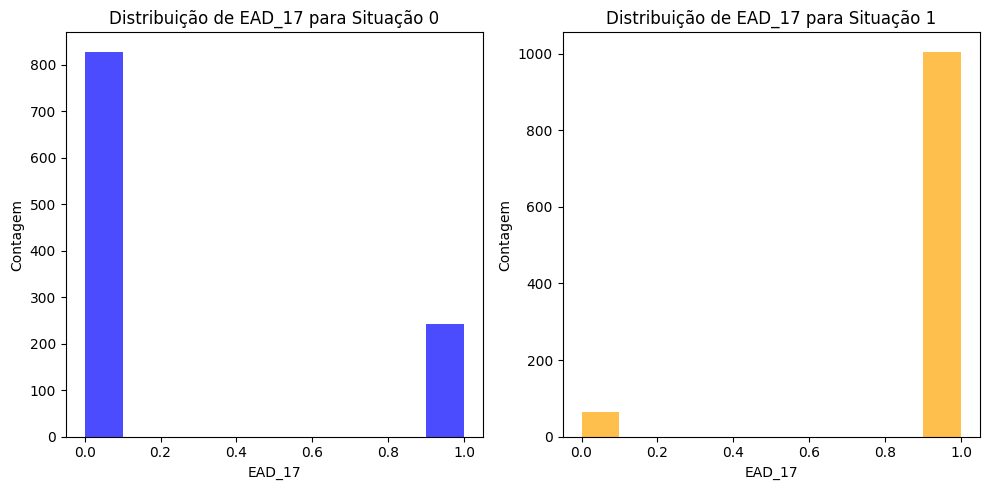

In [35]:
sit_0 = X_train_balanceado[X_train_balanceado['Situação'] == 0]
sit_1 = X_train_balanceado[X_train_balanceado['Situação'] == 1]

# Plotando dois gráficos de barras separados
plt.figure(figsize=(10, 5))

# Gráfico para Situação 0
plt.subplot(1, 2, 1)
plt.hist(sit_0['EAD_17'], color='blue', alpha=0.7)
plt.xlabel('EAD_17')
plt.ylabel('Contagem')
plt.title('Distribuição de EAD_17 para Situação 0')

# Gráfico para Situação 1
plt.subplot(1, 2, 2)
plt.hist(sit_1['EAD_17'], color='orange', alpha=0.7)
plt.xlabel('EAD_17')
plt.ylabel('Contagem')
plt.title('Distribuição de EAD_17 para Situação 1')

plt.tight_layout()
plt.show()